In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

QUESTIONS:
 - How to handle continuous data that is not really continuous (floors, rooms, etc.) - - start by treating them as continous then one hot encode and see if there is a change

In [17]:
# read in data
data = pd.read_csv('kc_house_data.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# check for duplicates
data.duplicated().any()

False

In [20]:
# check for missing values

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [21]:
3842 / len(data)

0.17789507802009538

In [22]:
# as missing data is <18% of total, we will remove all rows with missing information
data = data.dropna()

In [23]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
# no more missing values
len(data)

15762

In [25]:
# we still have 15K+ results to work with

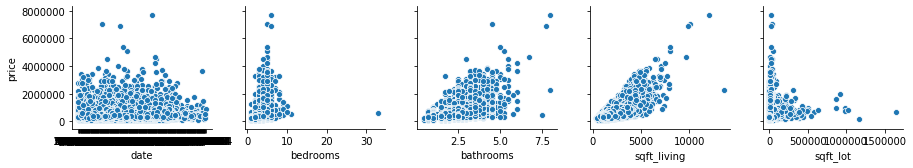

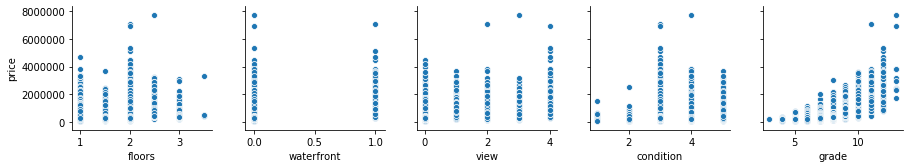

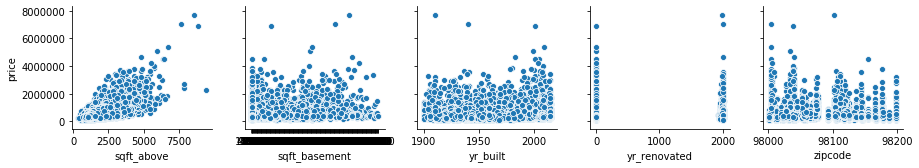

In [26]:
# plot all variables against price to begin to think about regression
sns.pairplot(data = data,
             x_vars = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'],
             y_vars = ['price'])

sns.pairplot(data = data,
             x_vars = ['floors', 'waterfront', 'view', 'condition', 'grade'],
             y_vars = ['price'])

sns.pairplot(data = data,
             x_vars = ['sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
             y_vars = ['price'])

We will be using the OSEMN Data Science Process:
1. Obtain Data
2. Scrub
3. Explore
4. Model
5. Interpret

In [27]:
# handle categorical variables (one hot encode)
cat_vars = ['waterfront', 'view', 'condition', 'grade']

In [28]:
# create dummies
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='waterfront', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(data['condition'], prefix='view', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)

In [29]:
preprocessed = data.drop(cat_vars, axis=1)
preprocessed

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [30]:
preprocessed = pd.concat([preprocessed, waterfront_dummies, view_dummies,
                          condition_dummies, grade_dummies], axis=1)
preprocessed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,3890,1530.0,...,0,0,0,0,0,0,0,1,0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,1715,?,...,0,0,0,1,0,0,0,0,0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

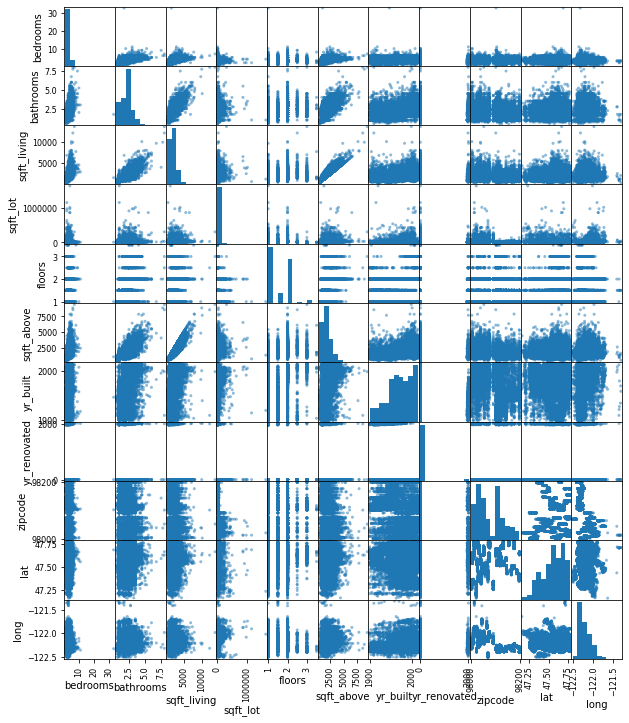

In [32]:
# check variable distributions
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 
          'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'] 
          
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [33]:
import numpy as np

In [34]:
# log transform all numerical features
non_normal = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 
              'yr_renovated', 'zipcode', 'lat', 'long']

for feature in non_normal:
    preprocessed[feature] = preprocessed[feature].map(lambda x: np.log(x))

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


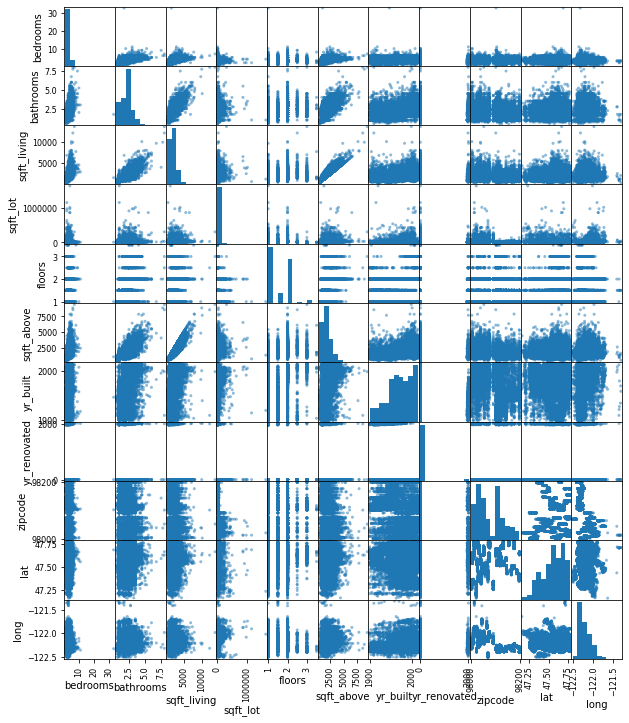

In [35]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [36]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
